# Aim 

The aim of this code is to:

1. Perform some EDA, and inspect/go over the data
2. Explore a section of the data, see if any correlations exist

I am looking at Section B which talks about using the internet to find information. Replacing missing data with NaN


In [1]:
#import the relavant packages
import datetime
import json
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import collections
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_samples
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_samples
import matplotlib.pyplot as plt
from matplotlib import cm

In [2]:
# Read the data file and take a look at the data
local_folder = '.'
df = pd.read_sas(os.path.join(local_folder, 'hints5_cycle3_public.sas7bdat'),encoding='mac_roman')

#display all columns and the first couple of rows
pd.set_option('display.max_columns', None)
df.head(15);

In [3]:
#convert missing data with NaN for EDA
df['AgeGrpB'].replace(-9.0, np.nan, inplace = True)
df['AgeGrpB'].replace(-4.0, np.nan, inplace = True)
df['SeekHealthInfo'].replace(-9.0, np.nan, inplace = True)
df['UseInternet'].replace(-9.0, np.nan, inplace = True)
df['Electronic_SelfHealthInfo'].replace(-9.0, np.nan, inplace = True)
df['Electronic_BuyMedicine'].replace(-9.0, np.nan, inplace = True)
df['Electronic_TalkDoctor'].replace(-9.0, np.nan, inplace = True)
df['Electronic_TrackedHealthCosts'].replace(-9.0, np.nan, inplace = True)
df['Electronic_MadeAppts'].replace(-9.0, np.nan, inplace = True)
df['TabletHealthWellnessApps'].replace([-9.0,-7.0,-6.0,-5.0,-2.0,-1.0], np.nan, inplace = True)
df['HaveDevice_SmartPh'].replace([-9.0,-7.0], np.nan, inplace = True)
df['Tablet_AchieveGoal'].replace([-9.0,-7.0,-6.0,-5.0,-2.0,-1.0], np.nan, inplace = True)
df['Tablet_MakeDecision'].replace([-9.0,-7.0,-6.0,-5.0,-2.0,-1.0], np.nan, inplace = True)

Plot a correlation table

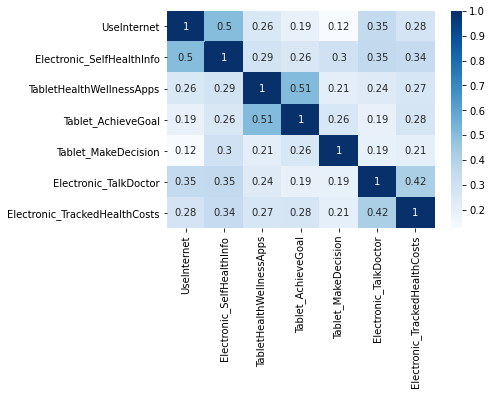

In [4]:
correlation =df[['UseInternet','Electronic_SelfHealthInfo','TabletHealthWellnessApps','Tablet_AchieveGoal',\
                'Tablet_MakeDecision','Electronic_TalkDoctor', \
   'Electronic_TrackedHealthCosts']].corr()
sns.heatmap(correlation, annot=True, cmap = 'Blues')
plt.show()

Not sure know to interpret this data, nor if this is a useful EDA for categorical data

***Next*** we try pivot tables

In [5]:
#label the different age groups
df['AgeGrpB'].replace({1: '18-34', 2:'35-49', 3:'50-64', 4:'65-74',5:'75+'},inplace = True)
df['TabletHealthWellnessApps'].replace({1: 'Has App', 2:'No App', 3:"Don't know"},inplace = True)

In [6]:
table = pd.pivot_table(data=df, index='AgeGrpB', columns=['TabletHealthWellnessApps'],values='Tablet_AchieveGoal')
print(table)

TabletHealthWellnessApps  Don't know   Has App    No App
AgeGrpB                                                 
18-34                       1.642857  1.185185  1.738462
35-49                       1.772727  1.231561  1.839506
50-64                       1.845070  1.337017  1.862776
65-74                       1.818182  1.492424  1.929515
75+                         1.983607  1.613139  1.949772


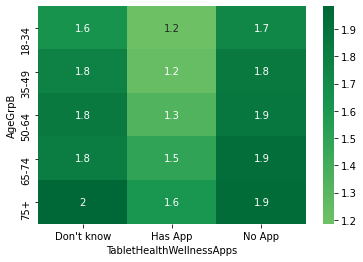

In [7]:
sns.heatmap(table, annot=True, cmap = 'RdYlGn', center=0.117)
plt.show()

a value closer to 1 means that the group are more likely to use the devices (tablet/smartphone) for health related goals, 2 means the opposite. So the plot shows that the 18-35 age group are most like to use their devices for health